<a href="https://colab.research.google.com/github/mngugi/DS_Collections/blob/main/Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing necessary libraries

In [ ]:
!pip install tensorflow

In [ ]:
#importing tensorflow
import tensorflow as tf
from tensorflow import keras
#data manipulation
import numpy as np
import matplotlib.pyplot as plt


###Importing the dataset

In [ ]:
#importing the nmist dataset
mnist = keras.datasets.mnist

###Defining the training and testing variables

In [ ]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###Checking the shape of the train and the test set

In [ ]:
print('training_shape:', x_train.shape)
print('training_shape of y:', y_train.shape)
print('testing_shape:', x_test.shape)
print('testing_shape of y:', y_test.shape)

training_shape: (60000, 28, 28)
training_shape of y: (60000,)
testing_shape: (10000, 28, 28)
testing_shape of y: (10000,)


###Normalizing the images

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

###Plotting the data to check the images

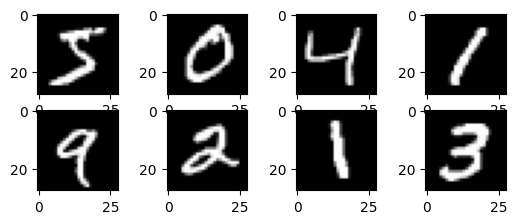

In [ ]:
#function to plot the images
for i in range(8):
  plt.subplot(4,4, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
plt.show()

###Building the model

In [ ]:
model = keras.models.Sequential([
    #flattening the images
    keras.layers.Flatten(input_shape = (28,28)),
    #dense layer
    keras.layers.Dense(128, activation = 'relu'),
    #output layer
    keras.layers.Dense(10)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


###Adding the loss and optimizer

In [ ]:
# getting the loss using sparse categorical crossentropy
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)

#creating optimizers
optims = keras.optimizers.Adam(lr = 0.001)
metrics= ['accuracy']


###Configuring the model for training

In [ ]:
#compiling the model
model.compile(loss = loss, optimizer = optims, metrics = metrics)

###Training the model

In [ ]:
#training the model
model.fit(x_train,y_train, batch_size = 70, epochs = 10, shuffle = True, verbose = 2)

Epoch 1/10
858/858 - 4s - loss: 0.3059 - accuracy: 0.9151 - 4s/epoch - 5ms/step
Epoch 2/10
858/858 - 2s - loss: 0.1351 - accuracy: 0.9607 - 2s/epoch - 2ms/step
Epoch 3/10
858/858 - 2s - loss: 0.0942 - accuracy: 0.9732 - 2s/epoch - 2ms/step
Epoch 4/10
858/858 - 2s - loss: 0.0730 - accuracy: 0.9787 - 2s/epoch - 2ms/step
Epoch 5/10
858/858 - 2s - loss: 0.0581 - accuracy: 0.9829 - 2s/epoch - 2ms/step
Epoch 6/10
858/858 - 2s - loss: 0.0468 - accuracy: 0.9865 - 2s/epoch - 3ms/step
Epoch 7/10
858/858 - 2s - loss: 0.0381 - accuracy: 0.9890 - 2s/epoch - 2ms/step
Epoch 8/10
858/858 - 2s - loss: 0.0311 - accuracy: 0.9912 - 2s/epoch - 2ms/step
Epoch 9/10
858/858 - 2s - loss: 0.0250 - accuracy: 0.9930 - 2s/epoch - 2ms/step
Epoch 10/10
858/858 - 2s - loss: 0.0211 - accuracy: 0.9944 - 2s/epoch - 2ms/step


###Evaluating the model

In [ ]:
#evaluating the model
model.evaluate(x_test, y_test, batch_size = 70, verbose = 2)

143/143 - 0s - loss: 0.0703 - accuracy: 0.9798 - 376ms/epoch - 3ms/step


[0.07029107958078384, 0.9797999858856201]

###Making predictions on the model

In [ ]:
#creating a new model
prod = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

#making predictions
prediction = prod(x_test)
prediction1 = prediction[0]
print(prediction1)

# getting the class with highest probability
max_prob = np.argmax(prediction1)
print(max_prob)


tf.Tensor(
[7.3046294e-06 1.9951345e-09 2.1550979e-05 3.1082416e-03 6.5147644e-12
 7.8701568e-08 1.1155257e-11 9.9683905e-01 1.0193582e-07 2.3675579e-05], shape=(10,), dtype=float32)
7


- class 7 has the highest probability